In [1]:
# import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

from matplotlib import font_manager as fm 
from matplotlib import cm 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from scipy.sparse import hstack

In [2]:
df_train=pd.read_csv('review_train.csv')
df_test=pd.read_csv('review_test.csv')
df_train

,REVIEW_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,17023,0,5.0,Y,Baby,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...
1,3260,1,4.0,N,Home Entertainment,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...
2,3834,1,4.0,N,Musical Instruments,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...
3,3284,1,4.0,N,Home Entertainment,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i..."
4,15519,0,5.0,Y,Watches,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t..."
5,16112,0,5.0,Y,Health & Personal Care,B00OBFK5J6,DenadaDance Tailor’s Bunion Pads Set of 3 - So...,I was a little skeptical when I opened the pac...,I was a little skeptical when I opened the pac...
6,6811,1,5.0,N,Sports,B00D6HG6S4,Bixle 1/2-Inch Extra Thick 15 mm 72-Inch Long ...,"Hello sit-ups, it's been a while!",I am a somewhat overweight male. I got this be...
7,12637,0,NaN,Y,Home Improvement,B002VZUKH0,"Master Airbrush Brand 1/4"" BSP Male to 1/8"" BS...",Works exactly as advertised,I purchased this for use on a TC compressor an...
8,6392,1,5.0,Y,Sports,B00QQGDPIQ,PYRUS Magnet Wireless Headphones Bluetooth V4....,Nice set of headphones. Best buy. You won't re...,"Took a little longer to arrive, but there's no..."
9,5793,1,5.0,N,Automotive,B00T6DUL2Y,**MOST HEALTHY** Car Air Purifier Ionizer with...,highly recommend!!,I have to say that this is the best car air pu...


In [3]:
df_train.isnull().sum()

REVIEW_ID              0
LABEL                  0
RATING                94
VERIFIED_PURCHASE    119
PRODUCT_CATEGORY     113
PRODUCT_ID           129
PRODUCT_TITLE         99
REVIEW_TITLE          96
REVIEW_TEXT           93
dtype: int64

In [4]:
df_test.isnull().sum()

REVIEW_ID            0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

In [5]:
for column in ['RATING','VERIFIED_PURCHASE']:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

In [6]:
#fill missing value in last 3 column
df_train['PRODUCT_TITLE'] = df_train['PRODUCT_TITLE'].fillna(0)
df_train['REVIEW_TEXT'] = df_train['REVIEW_TEXT'].fillna(0)
df_train['REVIEW_TITLE'] = df_train['REVIEW_TITLE'].fillna(0)

In [7]:
#fill NoVerify to replace missing value in verified_purchase

df_train['PRODUCT_ID'] = df_train['PRODUCT_ID'].apply(lambda x: "NoID" if pd.isnull(x) else x)
df_train['PRODUCT_CATEGORY'] = df_train['PRODUCT_CATEGORY'].apply(lambda x: "Others" if pd.isnull(x) else x)


In [8]:
df_train.isnull().sum()

REVIEW_ID            0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

# EDA

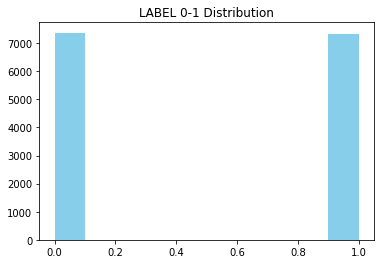

In [9]:
#domestrate the lable distribution
plt.hist(df_train['LABEL'], color = "SKYBLUE")
plt.title("LABEL 0-1 Distribution")
plt.show()

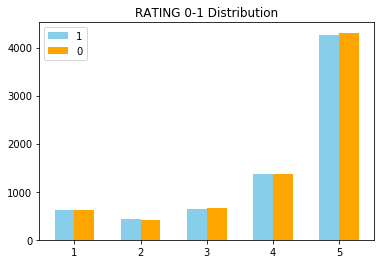

In [10]:
#看rating和fake的关系
num_rating1 = df_train[df_train['LABEL']==1]['RATING'].value_counts() 
num_rating0 = df_train[df_train['LABEL']==0]['RATING'].value_counts() 

plt.bar(num_rating1.index,num_rating1.values, color = "skyblue",width=-0.3, align='edge', label=1)
plt.bar(num_rating0.index,num_rating0.values, color = "orange", width=0.3,align='edge' ,label=0)
plt.title("RATING 0-1 Distribution")
plt.legend()
plt.show()

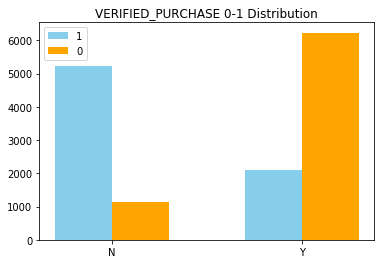

In [11]:
#corelation bewteen verified purchase and label
num_verified1 = df_train[df_train['LABEL']==1]['VERIFIED_PURCHASE'].value_counts() 
num_verified0 = df_train[df_train['LABEL']==0]['VERIFIED_PURCHASE'].value_counts() 

plt.bar(num_verified1.index,num_verified1.values,color = "skyblue", width=-0.3, align='edge', label=1)
plt.bar(num_verified0.index,num_verified0.values, color = "orange",width=0.3,align='edge' ,label=0)
plt.title("VERIFIED_PURCHASE 0-1 Distribution")
plt.legend()
plt.show()

In [12]:
# count how many product in each category
df_train_group = df_train.groupby('PRODUCT_CATEGORY')
df_train_group.count()['REVIEW_ID']

PRODUCT_CATEGORY
Apparel                   495
Automotive                493
Baby                      480
Beauty                    471
Books                     518
Camera                    474
Electronics               482
Furniture                 500
Grocery                   503
Health & Personal Care    484
Home                      476
Home Entertainment        478
Home Improvement          503
Jewelry                   477
Kitchen                   504
Lawn and Garden           493
Luggage                   504
Musical Instruments       449
Office Products           510
Others                    113
Outdoors                  481
PC                        509
Pet Products              484
Shoes                     468
Sports                    459
Tools                     486
Toys                      488
Video DVD                 481
Video Games               483
Watches                   488
Wireless                  466
Name: REVIEW_ID, dtype: int64

In [13]:
df_train_group.sum()['LABEL']

PRODUCT_CATEGORY
Apparel                   241
Automotive                251
Baby                      234
Beauty                    232
Books                     262
Camera                    228
Electronics               249
Furniture                 241
Grocery                   243
Health & Personal Care    244
Home                      232
Home Entertainment        236
Home Improvement          251
Jewelry                   240
Kitchen                   253
Lawn and Garden           252
Luggage                   260
Musical Instruments       232
Office Products           244
Others                     80
Outdoors                  236
PC                        251
Pet Products              245
Shoes                     227
Sports                    234
Tools                     250
Toys                      243
Video DVD                 240
Video Games               241
Watches                   233
Wireless                  225
Name: LABEL, dtype: int64

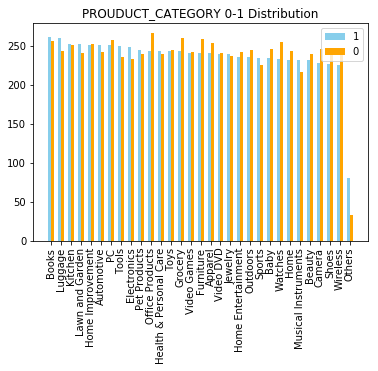

In [14]:
num_categ1 = df_train[df_train['LABEL']==1]['PRODUCT_CATEGORY'].value_counts() 
num_categ0 = df_train[df_train['LABEL']==0]['PRODUCT_CATEGORY'].value_counts() 
plt.bar(num_categ1.index,num_categ1.values, color = "skyblue",width=-0.3, align='edge', label=1)
plt.bar(num_categ0.index,num_categ0.values, color = "orange",width=0.3,align='edge' ,label=0)
plt.title("PROUDUCT_CATEGORY 0-1 Distribution")
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Feature engnieering

In [15]:
#Change category into dummy variable
df_train = pd.get_dummies(df_train, columns=["VERIFIED_PURCHASE"], drop_first=True)
df_train = pd.get_dummies(df_train, columns=["PRODUCT_CATEGORY"], drop_first=True)
df_train.head()
# test data
#Change category into dummy variable
df_test = pd.get_dummies(df_test, columns=["VERIFIED_PURCHASE"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["PRODUCT_CATEGORY"], drop_first=True)
df_test.head()

,REVIEW_ID,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,PRODUCT_CATEGORY_Beauty,...,PRODUCT_CATEGORY_PC,PRODUCT_CATEGORY_Pet Products,PRODUCT_CATEGORY_Shoes,PRODUCT_CATEGORY_Sports,PRODUCT_CATEGORY_Tools,PRODUCT_CATEGORY_Toys,PRODUCT_CATEGORY_Video DVD,PRODUCT_CATEGORY_Video Games,PRODUCT_CATEGORY_Watches,PRODUCT_CATEGORY_Wireless
0,2,4,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11,1,B00VQNLQL2,#1 Most Potent Male Performance Enhancement Su...,Unfortunately they didn't work for me.,Unfortunately they didn't work for me. They ma...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,4,B00IWOJS9A,"Proctor Silex K2070YA Electric Kettle, 1-Liter",She said that it is easy to use,This kettle is a gift for my daughter. She sai...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,4,B000TD0PXU,Now Foods Mood Support With St Johns Wort Veg-...,Just OK,Only giving this 3 stars because it is so chea...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,4,B00KNXIDH6,100 Tablet CleanGuard Nightguard Cleaner,and he was satisfied with this,These tablets are especially helpful if you us...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_train.corr()["LABEL"].abs().sort_values().tail(10)

PRODUCT_CATEGORY_Musical Instruments    0.006413
PRODUCT_CATEGORY_Camera                 0.006435
PRODUCT_CATEGORY_Luggage                0.006494
PRODUCT_CATEGORY_Electronics            0.006613
PRODUCT_CATEGORY_Office Products        0.007662
PRODUCT_CATEGORY_Watches                0.007850
PRODUCT_CATEGORY_Others                 0.036848
VERIFIED_PURCHASE_Y                     0.563094
REVIEW_ID                               0.866366
LABEL                                   1.000000
Name: LABEL, dtype: float64

In [17]:
price_correlation = df_train.corr()["LABEL"].abs().sort_values()
high_correlation = price_correlation.tail(10)
high_correlation

PRODUCT_CATEGORY_Musical Instruments    0.006413
PRODUCT_CATEGORY_Camera                 0.006435
PRODUCT_CATEGORY_Luggage                0.006494
PRODUCT_CATEGORY_Electronics            0.006613
PRODUCT_CATEGORY_Office Products        0.007662
PRODUCT_CATEGORY_Watches                0.007850
PRODUCT_CATEGORY_Others                 0.036848
VERIFIED_PURCHASE_Y                     0.563094
REVIEW_ID                               0.866366
LABEL                                   1.000000
Name: LABEL, dtype: float64

In [18]:
df_selected = df_train[high_correlation.index].copy()
print(df_selected.shape)

(14700, 10)


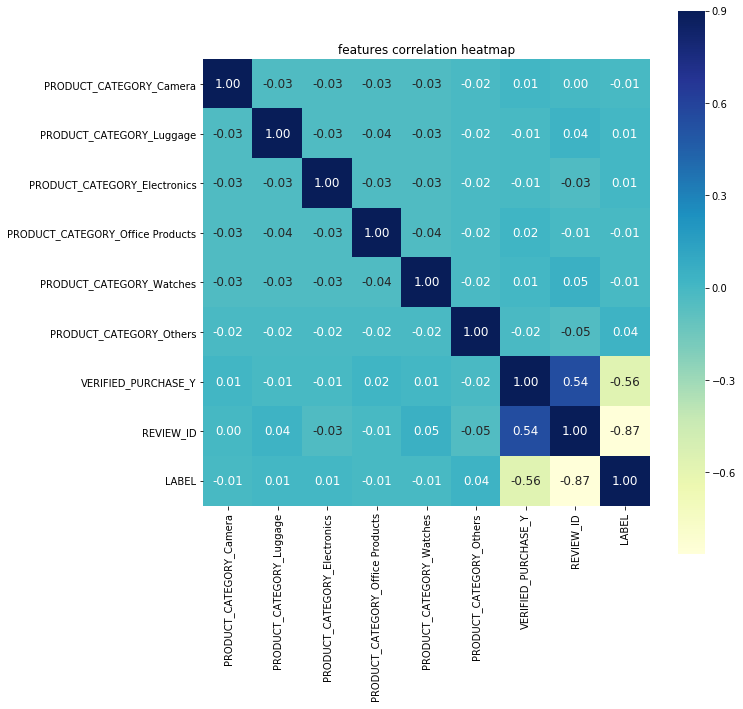

In [19]:
import seaborn as sns
# heatmap to find the correlation of corr > 0.2
corr =df_selected.iloc[:,1:].corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=0.9, annot_kws={'size': 12},square=True, annot=True, fmt=".2f",cmap="YlGnBu")
plt.title('features correlation heatmap')
plt.savefig("features correlation heatmap")

## deal with raw text

### length of review

In [20]:
#把句子分成字符
df_train['arr_title'] = df_train['REVIEW_TITLE'].str.split(" ")
df_train['arr_text']= df_train['REVIEW_TEXT'].str.split(" ")
# test
df_test['arr_title'] = df_train['REVIEW_TITLE'].str.split(" ")
df_test['arr_text']= df_train['REVIEW_TEXT'].str.split(" ")

In [21]:
df_train.head()

,REVIEW_ID,LABEL,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,...,PRODUCT_CATEGORY_Shoes,PRODUCT_CATEGORY_Sports,PRODUCT_CATEGORY_Tools,PRODUCT_CATEGORY_Toys,PRODUCT_CATEGORY_Video DVD,PRODUCT_CATEGORY_Video Games,PRODUCT_CATEGORY_Watches,PRODUCT_CATEGORY_Wireless,arr_title,arr_text
0,17023,0,5.0,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,1,0,1,...,0,0,0,0,0,0,0,0,"[Great, idea, for, Mom's, with, teething, babies]","[Great, idea, for, Mom's, with, teething, babi..."
1,3260,1,4.0,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,0,0,0,...,0,0,0,0,0,0,0,0,"[Great, purchase, for, the, price]","[We, needed, a, new, VCR, and, found, this, on..."
2,3834,1,4.0,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,0,0,0,...,0,0,0,0,0,0,0,0,"[the, best, trombone]","[my, so, love, trombone, and, so, i, purchased..."
3,3284,1,4.0,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...",0,0,0,...,0,0,0,0,0,0,0,0,"[Works, well]","[I, picked, up, one, of, these, recently,, doe..."
4,15519,0,5.0,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...",1,0,0,...,0,0,0,0,0,0,1,0,"[Excellent, article!]","[Very, elegant, and, sophisticated, watch,, I,..."


In [22]:
#数每个句子的字符长度
df_train['len_title'] = df_train['arr_title'].str.len()
df_train['len_text'] = df_train['arr_text'].str.len()
# test
df_test['len_title'] = df_train['arr_title'].str.len()
df_test['len_text'] = df_train['arr_text'].str.len()
df_train.head()

,REVIEW_ID,LABEL,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,...,PRODUCT_CATEGORY_Tools,PRODUCT_CATEGORY_Toys,PRODUCT_CATEGORY_Video DVD,PRODUCT_CATEGORY_Video Games,PRODUCT_CATEGORY_Watches,PRODUCT_CATEGORY_Wireless,arr_title,arr_text,len_title,len_text
0,17023,0,5.0,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,1,0,1,...,0,0,0,0,0,0,"[Great, idea, for, Mom's, with, teething, babies]","[Great, idea, for, Mom's, with, teething, babi...",7.0,21.0
1,3260,1,4.0,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,0,0,0,...,0,0,0,0,0,0,"[Great, purchase, for, the, price]","[We, needed, a, new, VCR, and, found, this, on...",5.0,47.0
2,3834,1,4.0,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,0,0,0,...,0,0,0,0,0,0,"[the, best, trombone]","[my, so, love, trombone, and, so, i, purchased...",3.0,53.0
3,3284,1,4.0,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...",0,0,0,...,0,0,0,0,0,0,"[Works, well]","[I, picked, up, one, of, these, recently,, doe...",2.0,32.0
4,15519,0,5.0,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...",1,0,0,...,0,0,0,0,1,0,"[Excellent, article!]","[Very, elegant, and, sophisticated, watch,, I,...",2.0,21.0


In [23]:
len_title0 = df_train[df_train['LABEL']==0]['len_title']
len_title1= df_train[df_train['LABEL']==1]['len_title']
# 前面一半是筛选条件，后面是把长度取出来
# Tips:这里是不需要fillna的，但是在作业里会有空值现象，在做完时需要fillna
len_text0 = df_train[df_train['LABEL']==0]['len_text']
len_text1 = df_train[df_train['LABEL']==1]['len_text']


/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/apple/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


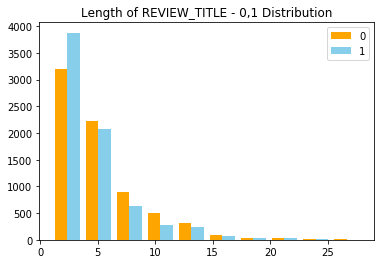

In [24]:
# 显示的是从第五个字开始 错的可能性就越小
plt.hist([len_title0,len_title1],color = ["orange", "skyblue"],label=[0,1])
# 前面把要填入的数据放入[]这样的list里，在后面的label的位置，把对应的label放进去。
plt.title("Length of REVIEW_TITLE - 0,1 Distribution")
plt.legend()
plt.show()

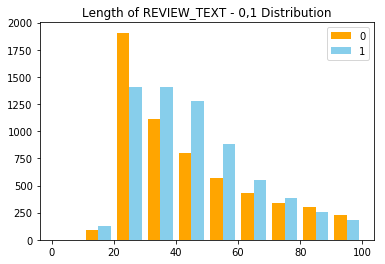

In [25]:
plt.hist([len_text0,len_text1],label=[0,1],color = ["orange", "skyblue"],range=(0,100))
# 前面把要填入的数据放入[]这样的list里，在后面的label的位置，把对应的label放进去。
plt.title("Length of REVIEW_TEXT - 0,1 Distribution")
plt.legend()
plt.show()


### Percentage of capital words

In [26]:
df_train['cap_title'] = df_train['REVIEW_TITLE'].str.count(r'[A-Z]')/df_train['REVIEW_TITLE'].str.len()
df_train['cap_text'] = df_train['REVIEW_TEXT'].str.count(r'[A-Z]')/df_train['REVIEW_TEXT'].str.len()
# test
df_train['cap_title'] = df_train['REVIEW_TITLE'].str.count(r'[A-Z]')/df_train['REVIEW_TITLE'].str.len()
df_train['cap_text'] = df_train['REVIEW_TEXT'].str.count(r'[A-Z]')/df_train['REVIEW_TEXT'].str.len()

In [27]:
df_train.head(13)

,REVIEW_ID,LABEL,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,...,PRODUCT_CATEGORY_Video DVD,PRODUCT_CATEGORY_Video Games,PRODUCT_CATEGORY_Watches,PRODUCT_CATEGORY_Wireless,arr_title,arr_text,len_title,len_text,cap_title,cap_text
0,17023,0,5.0,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,1,0,1,...,0,0,0,0,"[Great, idea, for, Mom's, with, teething, babies]","[Great, idea, for, Mom's, with, teething, babi...",7.0,21.0,0.048780,0.046296
1,3260,1,4.0,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,0,0,0,...,0,0,0,0,"[Great, purchase, for, the, price]","[We, needed, a, new, VCR, and, found, this, on...",5.0,47.0,0.035714,0.042857
2,3834,1,4.0,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,0,0,0,...,0,0,0,0,"[the, best, trombone]","[my, so, love, trombone, and, so, i, purchased...",3.0,53.0,0.000000,0.000000
3,3284,1,4.0,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...",0,0,0,...,0,0,0,0,"[Works, well]","[I, picked, up, one, of, these, recently,, doe...",2.0,32.0,0.100000,0.069444
4,15519,0,5.0,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...",1,0,0,...,0,0,1,0,"[Excellent, article!]","[Very, elegant, and, sophisticated, watch,, I,...",2.0,21.0,0.055556,0.022727
5,16112,0,5.0,B00OBFK5J6,DenadaDance Tailor’s Bunion Pads Set of 3 - So...,I was a little skeptical when I opened the pac...,I was a little skeptical when I opened the pac...,1,0,0,...,0,0,0,0,"[I, was, a, little, skeptical, when, I, opened...","[I, was, a, little, skeptical, when, I, opened...",11.0,122.0,0.037037,0.023256
6,6811,1,5.0,B00D6HG6S4,Bixle 1/2-Inch Extra Thick 15 mm 72-Inch Long ...,"Hello sit-ups, it's been a while!",I am a somewhat overweight male. I got this be...,0,0,0,...,0,0,0,0,"[Hello, sit-ups,, it's, been, a, while!]","[I, am, a, somewhat, overweight, male., I, got...",6.0,65.0,0.030303,0.008902
7,12637,0,5.0,B002VZUKH0,"Master Airbrush Brand 1/4"" BSP Male to 1/8"" BS...",Works exactly as advertised,I purchased this for use on a TC compressor an...,1,0,0,...,0,0,0,0,"[Works, exactly, as, advertised]","[I, purchased, this, for, use, on, a, TC, comp...",4.0,27.0,0.037037,0.027972
8,6392,1,5.0,B00QQGDPIQ,PYRUS Magnet Wireless Headphones Bluetooth V4....,Nice set of headphones. Best buy. You won't re...,"Took a little longer to arrive, but there's no...",1,0,0,...,0,0,0,0,"[Nice, set, of, headphones., Best, buy., You, ...","[Took, a, little, longer, to, arrive,, but, th...",10.0,20.0,0.056604,0.020548
9,5793,1,5.0,B00T6DUL2Y,**MOST HEALTHY** Car Air Purifier Ionizer with...,highly recommend!!,I have to say that this is the best car air pu...,0,1,0,...,0,0,0,0,"[highly, recommend!!]","[I, have, to, say, that, this, is, the, best, ...",2.0,85.0,0.000000,0.016432


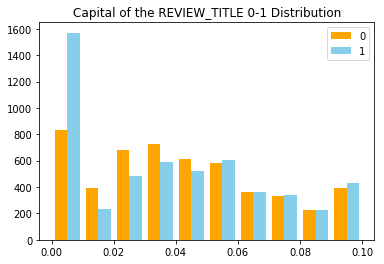

In [28]:
plt.hist([df_train[df_train['LABEL']==0]['cap_title'],df_train[df_train['LABEL']==1]['cap_title']],color = ["orange", "skyblue"],label=[0,1],range=(0,0.1))
plt.title("Capital of the REVIEW_TITLE 0-1 Distribution")
plt.legend()
plt.show()

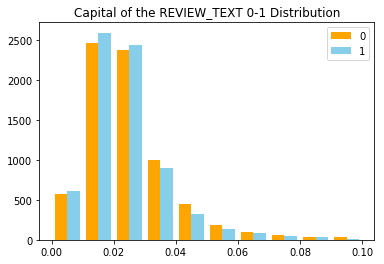

In [29]:
plt.hist([df_train[df_train['LABEL']==0]['cap_text'],df_train[df_train['LABEL']==1]['cap_text']],color = ["orange", "skyblue"],label=[0,1],range=(0,0.1))
plt.title("Capital of the REVIEW_TEXT 0-1 Distribution")
plt.legend()
plt.show()

In [30]:
df_train.isnull().sum()

REVIEW_ID                                   0
LABEL                                       0
RATING                                      0
PRODUCT_ID                                  0
PRODUCT_TITLE                               0
REVIEW_TITLE                                0
REVIEW_TEXT                                 0
VERIFIED_PURCHASE_Y                         0
PRODUCT_CATEGORY_Automotive                 0
PRODUCT_CATEGORY_Baby                       0
PRODUCT_CATEGORY_Beauty                     0
PRODUCT_CATEGORY_Books                      0
PRODUCT_CATEGORY_Camera                     0
PRODUCT_CATEGORY_Electronics                0
PRODUCT_CATEGORY_Furniture                  0
PRODUCT_CATEGORY_Grocery                    0
PRODUCT_CATEGORY_Health & Personal Care     0
PRODUCT_CATEGORY_Home                       0
PRODUCT_CATEGORY_Home Entertainment         0
PRODUCT_CATEGORY_Home Improvement           0
PRODUCT_CATEGORY_Jewelry                    0
PRODUCT_CATEGORY_Kitchen          

In [31]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [32]:
df_test.isnull().sum()

REVIEW_ID                                  0
RATING                                     0
PRODUCT_ID                                 0
PRODUCT_TITLE                              0
REVIEW_TITLE                               0
REVIEW_TEXT                                0
VERIFIED_PURCHASE_Y                        0
PRODUCT_CATEGORY_Automotive                0
PRODUCT_CATEGORY_Baby                      0
PRODUCT_CATEGORY_Beauty                    0
PRODUCT_CATEGORY_Books                     0
PRODUCT_CATEGORY_Camera                    0
PRODUCT_CATEGORY_Electronics               0
PRODUCT_CATEGORY_Furniture                 0
PRODUCT_CATEGORY_Grocery                   0
PRODUCT_CATEGORY_Health & Personal Care    0
PRODUCT_CATEGORY_Home                      0
PRODUCT_CATEGORY_Home Entertainment        0
PRODUCT_CATEGORY_Home Improvement          0
PRODUCT_CATEGORY_Jewelry                   0
PRODUCT_CATEGORY_Kitchen                   0
PRODUCT_CATEGORY_Lawn and Garden           0
PRODUCT_CA

In [33]:
df_select = df_train.loc[:,['PRODUCT_TITLE','REVIEW_TITLE','REVIEW_TEXT']]
df_select_test = df_test.loc[:,['PRODUCT_TITLE','REVIEW_TITLE','REVIEW_TEXT']]
df_select.head()

,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...
1,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...
2,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...
3,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i..."
4,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t..."


In [34]:
df_select = df_select.applymap(str)
df_select_test = df_select_test.applymap(str)
#这里要把所有的都变为string，不然没有办法转为tfidf值
df_select.head()

,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...
1,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...
2,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...
3,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i..."
4,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t..."


In [35]:
#coding=utf-8
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfV_1 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)

#初始化模型，可以在里面设置参数
# df是document frequency，就是有多少个句子包含这个单词。
TfidfV_1.fit(df_select['PRODUCT_TITLE'])
# test
TfidfV_test_1 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)
TfidfV_test_1.fit(df_select_test['PRODUCT_TITLE'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.97, max_features=5000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
TfidfV_2 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)
#初始化模型，可以在里面设置参数
# df是document frequency，就是有多少个句子包含这个单词。
TfidfV_2.fit(df_select['REVIEW_TITLE'])
TfidfV_3 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)
#初始化模型，可以在里面设置参数
# df是document frequency，就是有多少个句子包含这个单词。
TfidfV_3.fit(df_select['REVIEW_TEXT'])
#test
TfidfV_test_2 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)
TfidfV_test_2.fit(df_select_test['REVIEW_TITLE'])
TfidfV_test_3 = TfidfVectorizer(stop_words = 'english',max_features=5000,min_df=2,max_df=0.97)
TfidfV_test_3.fit(df_select_test['REVIEW_TEXT'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.97, max_features=5000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [37]:
TfidfV_1_n = TfidfV_1.transform(df_select['PRODUCT_TITLE'])
TfidfV_2_n = TfidfV_2.transform(df_select['REVIEW_TITLE'])
TfidfV_3_n = TfidfV_3.transform(df_select['REVIEW_TEXT'])
# test
TfidfV_test_1_n = TfidfV_test_1.transform(df_select_test['PRODUCT_TITLE'])
TfidfV_test_2_n = TfidfV_test_2.transform(df_select_test['REVIEW_TITLE'])
TfidfV_test_3_n = TfidfV_test_3.transform(df_select_test['REVIEW_TEXT'])

In [38]:
TfidfV_1_a = TfidfV_1_n.toarray()
TfidfV_2_a = TfidfV_2_n.toarray()
TfidfV_3_a = TfidfV_3_n.toarray()
# test
TfidfV_test_1_a = TfidfV_test_1_n.toarray()
TfidfV_test_2_a = TfidfV_test_2_n.toarray()
TfidfV_test_3_a = TfidfV_test_3_n.toarray()

In [39]:
df_text1= pd.DataFrame(TfidfV_1_a)
text_feature_list1= ["text_"+v for v in TfidfV_1.get_feature_names()]
df_text1.columns = text_feature_list1

df_text2= pd.DataFrame(TfidfV_2_a)
text_feature_list2= ["text_"+v for v in TfidfV_2.get_feature_names()]
df_text2.columns = text_feature_list2

df_text3= pd.DataFrame(TfidfV_3_a)
text_feature_list3= ["text_"+v for v in TfidfV_3.get_feature_names()]
df_text3.columns = text_feature_list3

# test
df_text_test_1= pd.DataFrame(TfidfV_test_1_a)
text_feature_list_test_1= ["text_"+v for v in TfidfV_test_1.get_feature_names()]
df_text_test_1.columns = text_feature_list_test_1

df_text_test_2= pd.DataFrame(TfidfV_test_2_a)
text_feature_list_test_2= ["text_"+v for v in TfidfV_test_2.get_feature_names()]
df_text_test_2.columns = text_feature_list_test_2

df_text_test_3= pd.DataFrame(TfidfV_test_3_a)
text_feature_list_test_3= ["text_"+v for v in TfidfV_test_3.get_feature_names()]
df_text_test_3.columns = text_feature_list_test_3

In [40]:
#combine the last 3 columns with original dataset
df_all = pd.concat([df_train,df_text1,df_text2,df_text3], axis=1)

# test
df_test_all = pd.concat([df_test,df_text_test_1,df_text_test_2,df_text_test_3], axis=1)
df_all.head()

,REVIEW_ID,LABEL,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,...,text_yrs,text_yummy,text_zero,text_zildjian,text_zip,text_zipper,text_zippered,text_zippers,text_zone,text_zoom
0,17023,0,5.0,B00EZM7A34,"Bumkins Nixi Ciclo Silicone Teething Necklace,...",Great idea for Mom's with teething babies,Great idea for Mom's with teething babies. The...,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3260,1,4.0,B000MXB33S,Toshiba SD-V295 Tunerless DVD VCR Combo Player,Great purchase for the price,We needed a new VCR and found this one with th...,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3834,1,4.0,B00BR1IX8W,pBone PBONE2B Jiggs Mini Plastic Trombone for ...,the best trombone,my so love trombone and so i purchased this on...,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3284,1,4.0,B001DZFYPW,Toshiba SD-V296 Tunerless DVD VCR Combo Player...,Works well,"I picked up one of these recently, does what i...",0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15519,0,5.0,B0088BN3LG,Bulova Men's 98B169 CAMPTON Two-Tone Bracelet ...,Excellent article!,"Very elegant and sophisticated watch, I love t...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_test_all.head()

,REVIEW_ID,RATING,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,VERIFIED_PURCHASE_Y,PRODUCT_CATEGORY_Automotive,PRODUCT_CATEGORY_Baby,PRODUCT_CATEGORY_Beauty,...,text_yummy,text_zelda,text_zero,text_zinc,text_zip,text_zipper,text_zippered,text_zippers,text_zombies,text_zoom
0,2,4,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,1,B00VQNLQL2,#1 Most Potent Male Performance Enhancement Su...,Unfortunately they didn't work for me.,Unfortunately they didn't work for me. They ma...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,4,B00IWOJS9A,"Proctor Silex K2070YA Electric Kettle, 1-Liter",She said that it is easy to use,This kettle is a gift for my daughter. She sai...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,4,B000TD0PXU,Now Foods Mood Support With St Johns Wort Veg-...,Just OK,Only giving this 3 stars because it is so chea...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,4,B00KNXIDH6,100 Tablet CleanGuard Nightguard Cleaner,and he was satisfied with this,These tablets are especially helpful if you us...,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#drop unimportant variables
df_drop = df_all.drop(columns=['LABEL', 'REVIEW_ID','PRODUCT_TITLE','REVIEW_TITLE','REVIEW_TEXT','arr_text','arr_title','PRODUCT_ID'])
#test
df_test_drop = df_test_all.drop(columns=['REVIEW_ID','PRODUCT_TITLE','REVIEW_TITLE','REVIEW_TEXT','arr_text','arr_title','PRODUCT_ID'])

In [43]:
X_train, X_val, y_train, y_val = train_test_split(df_drop,df_all['LABEL'],test_size=0.2,random_state=0)

In [44]:
X_train.columns

Index(['RATING', 'VERIFIED_PURCHASE_Y', 'PRODUCT_CATEGORY_Automotive',
       'PRODUCT_CATEGORY_Baby', 'PRODUCT_CATEGORY_Beauty',
       'PRODUCT_CATEGORY_Books', 'PRODUCT_CATEGORY_Camera',
       'PRODUCT_CATEGORY_Electronics', 'PRODUCT_CATEGORY_Furniture',
       'PRODUCT_CATEGORY_Grocery',
       ...
       'text_yrs', 'text_yummy', 'text_zero', 'text_zildjian', 'text_zip',
       'text_zipper', 'text_zippered', 'text_zippers', 'text_zone',
       'text_zoom'],
      dtype='object', length=13261)

# PCA

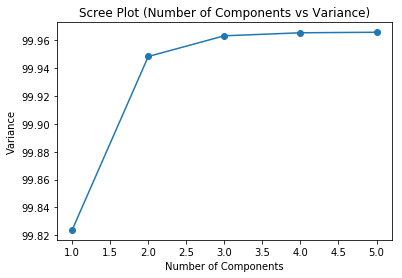

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
train_tfidf_pca = pca.fit_transform(X_train)
val_tfidf_pca = pca.fit_transform(X_val)

#test
cum_var = np.cumsum(pca.explained_variance_ratio_) * 100
plt.plot(np.arange(1, 6), cum_var, marker = "o")
plt.xlabel("Number of Components")
plt.ylabel("Variance")

plt.title("Scree Plot (Number of Components vs Variance)")

plt.show()

# 用PCA->logistic

In [46]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
# I'm using the hyper-parameter C to make the regression fit "tighter" to the data
# We will discuss how to optimise hyper parameters later
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Big C means small regularization
# Small C means more regularization
# So C = 1e16 (very large) we have barely any regularization
log_reg_pca = LogisticRegression(C = 1e16, solver = 'liblinear')  # Step 1: Initialize

# Fit the object to the data
log_reg_pca.fit(train_tfidf_pca, y_train)  # Step 2: Fit
# Step 3: Predict
y_pred_pca = log_reg_pca.predict(val_tfidf_pca)
print(classification_report(y_val,y_pred_pca))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1459
           1       0.84      0.70      0.76      1481

   micro avg       0.78      0.78      0.78      2940
   macro avg       0.79      0.78      0.78      2940
weighted avg       0.79      0.78      0.78      2940



# 不用pca->logistic

In [47]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
# I'm using the hyper-parameter C to make the regression fit "tighter" to the data
# We will discuss how to optimise hyper parameters later
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Big C means small regularization
# Small C means more regularization
# So C = 1e16 (very large) we have barely any regularization
log_reg = LogisticRegression(C = 1e16, solver = 'liblinear')  # Step 1: Initialize

# Fit the object to the data
log_reg.fit(X_train, y_train)  # Step 2: Fit
# Step 3: Predict
y_pred1 = log_reg.predict(X_val)
print(classification_report(y_val,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1459
           1       0.78      0.77      0.78      1481

   micro avg       0.78      0.78      0.78      2940
   macro avg       0.78      0.78      0.78      2940
weighted avg       0.78      0.78      0.78      2940



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'penalty':['l1','l2'],
                     'C':[0.01,0.1,0.5,1,5,10,100],
                    'solver':['liblinear'],
                    'multi_class':['ovr']},
                   {'penalty':['l2'],
                   'C':[0.01,0.1,0.5,1,5,10,100],
                   'solver':['lbfgs'],
                   'multi_class':['ovr','multinomial']}]
grid_s = GridSearchCV(LogisticRegression(tol=1e-6,random_state = 1),tuned_parameters,cv = 5, verbose = 1,n_jobs =5)
grid_LR = grid_s.fit(train_tfidf_pca, y_train)
print(b'Best parameters set found:',grid_LR.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  44 tasks      | elapsed:    3.3s


b'Best parameters set found:' {'C': 0.01, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:    5.2s finished


In [49]:
from sklearn import metrics
improve_LR = grid_LR.best_estimator_
y_pred_improve_LR=improve_LR.predict(val_tfidf_pca)
print(classification_report(y_val,y_pred_improve_LR))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1459
           1       0.84      0.70      0.77      1481

   micro avg       0.78      0.78      0.78      2940
   macro avg       0.79      0.78      0.78      2940
weighted avg       0.79      0.78      0.78      2940



In [50]:
# use test data to calculate the results

X_train_tfidf_pca_full = pca.fit_transform(df_drop)
Y_train_full = df_all['LABEL']
grid_LR_full = grid_s.fit(X_train_tfidf_pca_full, Y_train_full)
improve_LR_full = grid_LR_full.best_estimator_


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:    3.2s finished


In [62]:
y_pred_improve_LR_full = improve_LR_full.predict(pca.fit_transform(df_test_drop))

In [65]:
y_pred_improve_LR_full

array([1, 0, 0, ..., 1, 1, 1])

In [64]:
df_test_all['LABEL'] = y_pred_improve_LR_full
df_test_all['LABEL','REVIEW_ID'].to_csv('BUSS6002_Assignment2_Test_Results.csv')

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:2657: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


TypeError: Cannot convert bool to numpy.ndarray

# advance model

In [ ]:
# add feture to original model
df_train.corr()["LABEL"].abs().sort_values().tail(10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameter_space = {
    "penalty":['l1', 'l2'],
    "fit_intercept":[True,False]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_tfidf_pca, y_train )

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_tfidf_pca,y_train)

y_pred=clf.predict(test_tfidf_pca)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))